In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from analize.normalized_test import crossover
from Altcoin.altcoin.getData import getData
from Altcoin.altcoin.getBitfinexCandles import updateAll
import statsmodels.api as sm
%matplotlib inline

delta = '1D'

In [27]:
btc = getData('BTC', delta).loc['2017-08-01':]
eos = getData('EOS', delta).loc['2017-08-01':]
eth = getData('ETH', delta).loc['2017-08-01':]
iot = getData('IOT', delta).loc['2017-08-01':]
neo = getData('NEO', delta).loc['2017-08-01':]
omg = getData('OMG', delta).loc['2017-08-01':]
xrp = getData('XRP', delta).loc['2017-08-01':]

btc['Total Traded'] = btc['open']*btc['volume']
eos['Total Traded'] = eos['open']*eos['volume']
eth['Total Traded'] = eth['open']*eth['volume']
iot['Total Traded'] = iot['open']*iot['volume']
xrp['Total Traded'] = xrp['open']*xrp['volume']

In [28]:
btc.head()

,open,close,high,low,volume,Total Traded
MTS,,,,,,
2017-08-01 07:00:00,2854.1,2731.3,2902.2,2604.0,42307.809198,1.207507e+08
2017-08-02 07:00:00,2731.9,2702.0,2758.0,2610.0,23762.217343,6.491600e+07
2017-08-03 07:00:00,2702.2,2790.3,2820.0,2698.0,16855.037700,4.554568e+07
2017-08-04 07:00:00,2790.4,2860.0,2876.0,2762.1,18994.721001,5.300287e+07
2017-08-05 07:00:00,2860.0,3252.3,3339.5,2853.3,50558.240846,1.445966e+08


In [29]:
import mpl_finance
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

In [30]:
btc_month = btc.loc['2018-01'].reset_index()
btc_month['date_ax']= btc_month['MTS'].apply(lambda date: date2num(date))
btc_month.head()

,MTS,open,close,high,low,volume,Total Traded,date_ax
0,2018-01-01 07:00:00,13763.0,13376.0,13893.000000,12777.0,29564.929552,4.069021e+08,736695.291667
1,2018-01-02 07:00:00,13375.0,14722.0,15500.000000,12795.0,56192.952729,7.515807e+08,736696.291667
2,2018-01-03 07:00:00,14717.0,15150.0,15428.830919,14500.0,38358.373452,5.645202e+08,736697.291667
3,2018-01-04 07:00:00,15150.0,15159.0,15422.157853,14060.0,46479.982643,7.041717e+08,736698.291667
4,2018-01-05 07:00:00,15159.0,16911.0,17105.000000,14725.0,54627.601065,8.280998e+08,736699.291667


In [31]:
btc_values = [tuple(vals) for vals in btc_month[['date_ax','open','high','low','close']].values ]
# btc_values

In [32]:
mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

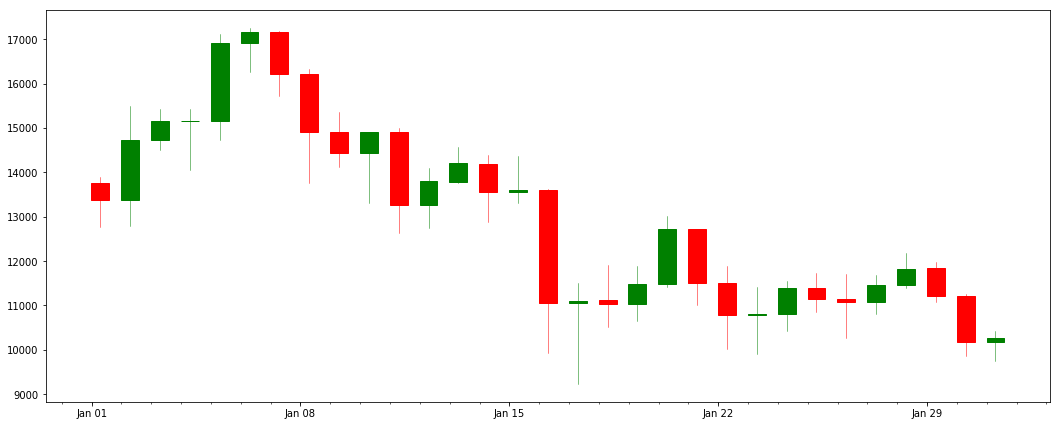

In [34]:
fig, ax = plt.subplots(figsize=(18,8))
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
# ax.xaxis.set_minor_formatter(dayFormatter)

candlestick_ohlc(ax, btc_values, width=0.6,colorup='g',colordown='r');